# Librarys and Dataset

In [318]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# Dataset Load

*  Using pandas, load dataset for processing.

In [319]:
data_org=pd.read_csv('risk_factors_cervical_cancer.csv')

# Dataset Pre-Processing

* Cleanup data. There's '?' and some null values in atributes. 

In [320]:
df = data_org.replace('?',np.nan)

In [321]:
df_copy = df.copy(deep = False)

In [322]:
columns = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
df.drop(columns, inplace=True, axis=1)

In [323]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']

#### MISSING VALUE TREATMENT

* For the categorical column like Smokes, Hormonal Contraceptives, IUD, Biopsy etc., the null values were replaced by the mode. And null values in the numerical column like Age, Number of sexual partners etc. present were replaced by their median values.



In [324]:
for feature in numerical_df:
    print(feature,'',df[feature].convert_objects(convert_numeric=True).median())
    feature_median = round(df[feature].convert_objects(convert_numeric=True).median(),1)
    df[feature] = df[feature].fillna(feature_median)

Age  25.0
Number of sexual partners  2.0
First sexual intercourse  17.0
Num of pregnancies  2.0
Smokes (years)  0.0
Smokes (packs/year)  0.0
Hormonal Contraceptives (years)  0.5
IUD (years)  0.0
STDs (number)  0.0


In [325]:
for feature in categorical_df:
    df[feature] = df[feature].convert_objects(convert_numeric=True).fillna(df[feature].mode()[0])

### Check All columns have been filled/Summary statistics.

In [326]:
df.isnull().sum()#No null left~

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [327]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,17,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,0,0,0,0,0,0,0,0,0,0


In [328]:
df.shape

(858, 34)

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

In [330]:
x = df.copy(deep=True)
x.drop(labels = ['Biopsy','Citology','Schiller','Hinselmann'],axis = 1, inplace = True)
y = df['Biopsy']

In [331]:
x.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,18,4,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,17,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,0,0,0,0,0,0,1,0,1,0
4,46,3,21,4,0,0,0,1,15,0,...,0,0,0,0,0,0,0,0,0,0


### *Shuffle the data, and split them into train set and test set.

In [332]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

## DecisionTree

In [333]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 7, random_state=1)
dt_model.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [334]:
dt_model.score(xtest , ytest)*100

91.47286821705426

In [335]:
from sklearn.metrics import accuracy_score
y_predict=dt_model.predict(xtest)
accuracy_score(ytest,y_predict)*100

91.47286821705426

In [338]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest,y_predict)*100

11.890717168581189

## Confusion matrix
Make confusion matrix to evaluate the performance of the prediction model.

In [339]:
from sklearn import metrics
cm=metrics.confusion_matrix(ytest,y_predict)
print(cm)
cr=metrics.classification_report(ytest,y_predict)
print(cr)

[[234   5]
 [ 17   2]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       239
           1       0.29      0.11      0.15        19

   micro avg       0.91      0.91      0.91       258
   macro avg       0.61      0.54      0.55       258
weighted avg       0.88      0.91      0.90       258



In [340]:
train_char_label = ['No', 'Yes']

In [341]:
features=x.columns

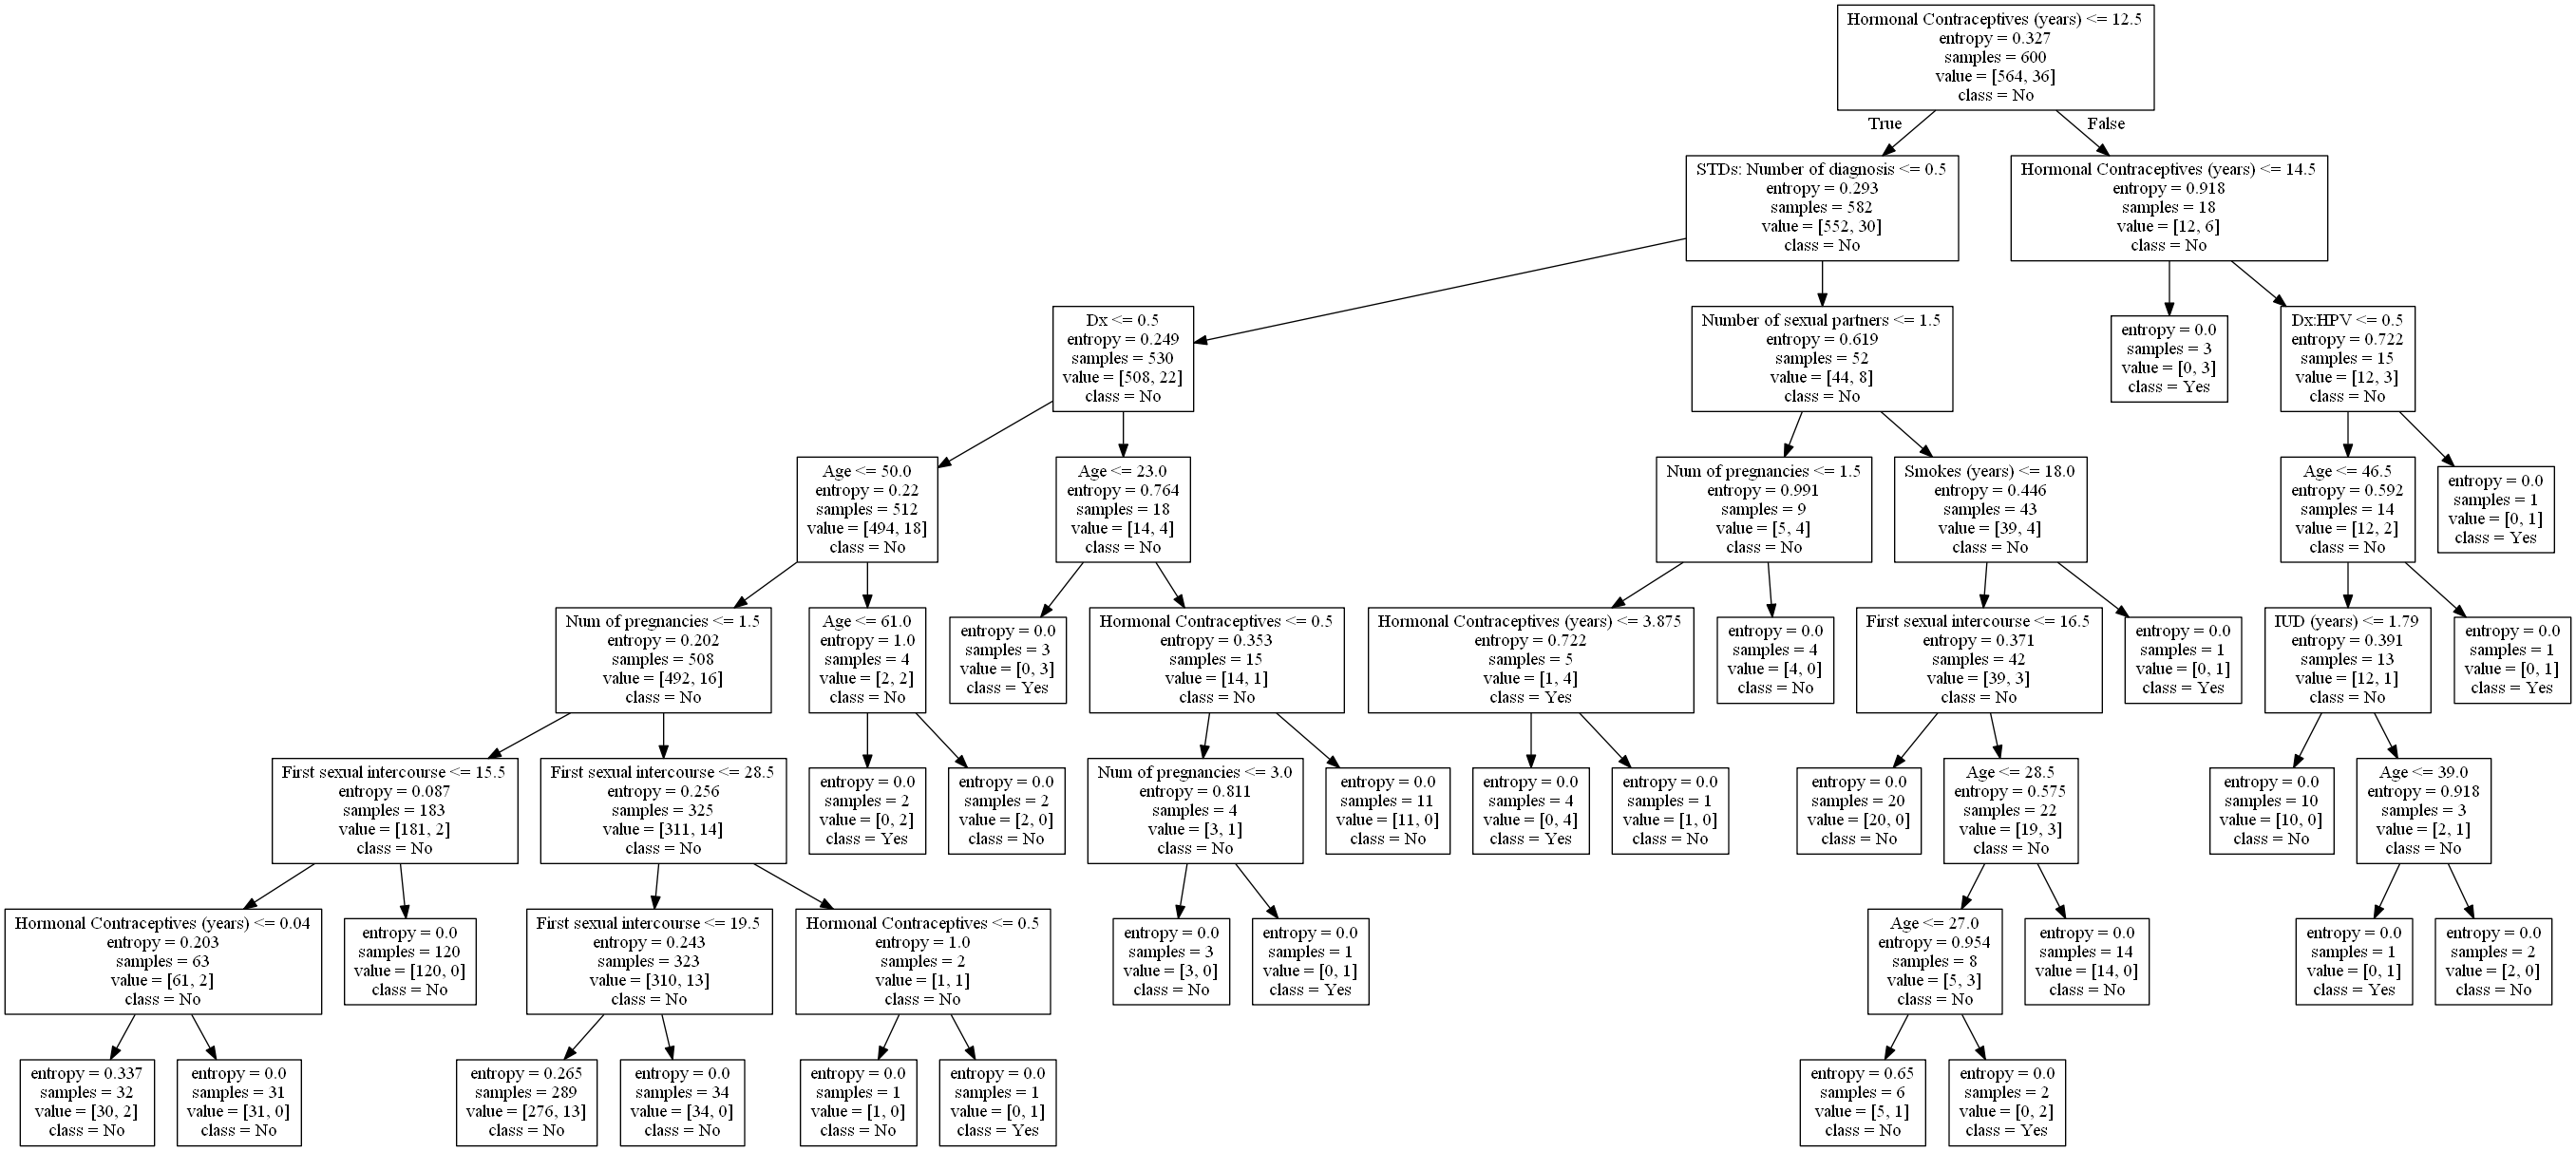

In [342]:
from sklearn import tree
import graphviz
import sklearn
from os import system
from IPython.display import Image  
#DTree_File = open('DT_tree.dot','w')
dotfile = open("biopsy_tree.dot", 'w')
dot_data=sklearn.tree.export_graphviz( dt_model,out_file=dotfile,label='all',feature_names=features,  class_names = list(train_char_label))
#graph = graphviz.Source(dot_data)
#graph
dotfile.close()
system("dot -Tpng biopsy_tree.dot -o biopsy_tree.png")   # This command is to the OS
Image("biopsy_tree.png") 

### Data normalization

In [343]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
scaler.fit(df)
print(scaler.data_max_)
df_scale = pd.DataFrame(scaler.transform(df),columns=df.columns)

[84. 28. 32. 11.  1. 37. 37.  1. 30.  1. 19.  1.  4.  1.  0.  1.  1.  1.
  1.  1.  1.  0.  1.  1.  1.  3.  1.  1.  1.  1.  1.  1.  1.  1.]


In [344]:
from scipy.stats import entropy
pd.DataFrame(entropy(df_scale),index=df.columns)

,0
Age,6.576111
Number of sexual partners,6.278124
First sexual intercourse,6.681647
Num of pregnancies,6.578513
Smokes,4.812184
Smokes (years),4.449037
Smokes (packs/year),4.014712
Hormonal Contraceptives,6.378426
Hormonal Contraceptives (years),5.703165
IUD,4.418841


In [345]:
from scipy.stats import variation
pd.DataFrame(variation(df_scale, axis = 0),index=df.columns)

,0
Age,0.614521
Number of sexual partners,1.087417
First sexual intercourse,0.398874
Num of pregnancies,0.620207
Smokes,2.444506
Smokes (years),3.378386
Smokes (packs/year),4.949969
Hormonal Contraceptives,0.675800
Hormonal Contraceptives (years),1.751538
IUD,3.055708


In [346]:
df_scale.corr()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.085971,0.369175,0.525892,0.057204,0.218261,0.131861,0.029201,0.295267,0.279429,...,0.040861,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.085971,1.000000,-0.145847,0.077439,0.236858,0.175729,0.174968,0.004027,0.021188,0.032460,...,0.014360,0.053056,0.023699,0.016669,0.028646,0.024597,-0.039098,-0.007230,0.024067,-0.000408
First sexual intercourse,0.369175,-0.145847,1.000000,-0.056374,-0.123280,-0.058207,-0.056232,-0.009232,0.025071,-0.010758,...,0.034728,-0.013331,0.067281,-0.032628,0.043964,0.035748,-0.016549,0.003489,-0.010974,0.007259
Num of pregnancies,0.525892,0.077439,-0.056374,1.000000,0.081517,0.175832,0.096976,0.118938,0.218805,0.204501,...,-0.026153,0.034912,0.036962,-0.002600,0.048578,0.014227,0.037809,0.085810,-0.027675,0.040215
Smokes,0.057204,0.236858,-0.123280,0.081517,1.000000,0.723572,0.493843,0.004036,0.041979,-0.055115,...,0.049193,0.090725,-0.013470,-0.042119,0.009737,-0.069396,0.033333,0.052028,-0.004639,0.028724
Smokes (years),0.218261,0.175729,-0.058207,0.175832,0.723572,1.000000,0.724320,-0.013888,0.052006,0.027492,...,0.051201,0.078303,0.052859,-0.030476,0.055398,-0.050213,0.070352,0.093479,-0.007275,0.061204
Smokes (packs/year),0.131861,0.174968,-0.056232,0.096976,0.493843,0.724320,1.000000,0.001713,0.043262,0.008226,...,-0.008015,0.029912,0.107229,-0.020800,0.109118,-0.034270,0.026086,0.017200,0.004250,0.024487
Hormonal Contraceptives,0.029201,0.004027,-0.009232,0.118938,0.004036,-0.013888,0.001713,1.000000,0.385833,0.000188,...,0.032666,-0.062199,0.011278,-0.004397,0.028808,-0.007245,0.012360,-0.034002,-0.025116,-0.018015
Hormonal Contraceptives (years),0.295267,0.021188,0.025071,0.218805,0.041979,0.052006,0.043262,0.385833,1.000000,0.110677,...,0.053756,-0.028285,0.062971,0.003793,0.065640,-0.009136,0.051093,0.096702,0.082537,0.094164
IUD,0.279429,0.032460,-0.010758,0.204501,-0.055115,0.027492,0.008226,0.000188,0.110677,1.000000,...,-0.015819,0.035791,0.117166,0.043708,0.062142,0.135778,0.052108,0.096089,0.013292,0.059231


In [347]:
category_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']

In [348]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats
from scipy.stats import chisquare,chi2_contingency,chi2
stat = []
for i in df.columns:
    for j in category_df:
        cont = pd.crosstab(df[i],
                           df[j],)
        chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(cont)
        #a = pd.DataFrame(stat.append(['chi_sq_Stat', 'p_value', 'deg_freedom', 'exp_freq'],columns))
        if p_value<=0.05:
            print('The feature and target variable is',i,'and',j)
            print('Critical Value is',chi2.isf(q=0.05, df=deg_freedom))
            print('Chi-square statistic %3.5f \nP value %1.6f \nDegrees of freedom %d\n' %(chi_sq_Stat, p_value,deg_freedom))

The feature and target variable is Age and Schiller
Critical Value is 59.30351202689981
Chi-square statistic 98.63142 
P value 0.000003 
Degrees of freedom 43

The feature and target variable is Age and Biopsy
Critical Value is 59.30351202689981
Chi-square statistic 89.19479 
P value 0.000045 
Degrees of freedom 43

The feature and target variable is Num of pregnancies and Schiller
Critical Value is 19.67513757268249
Chi-square statistic 26.44874 
P value 0.005562 
Degrees of freedom 11

The feature and target variable is Smokes (years) and Hinselmann
Critical Value is 43.77297182574217
Chi-square statistic 57.54721 
P value 0.001805 
Degrees of freedom 30

The feature and target variable is Smokes (years) and Schiller
Critical Value is 43.77297182574217
Chi-square statistic 47.25149 
P value 0.023512 
Degrees of freedom 30

The feature and target variable is Smokes (packs/year) and Hinselmann
Critical Value is 81.38101518889911
Chi-square statistic 112.67691 
P value 0.000089 
Degrees

The feature and target variable is Dx:CIN and Biopsy
Critical Value is 3.8414588206941285
Chi-square statistic 6.92192 
P value 0.008515 
Degrees of freedom 1

The feature and target variable is Dx:HPV and Hinselmann
Critical Value is 3.8414588206941285
Chi-square statistic 11.09336 
P value 0.000866 
Degrees of freedom 1

The feature and target variable is Dx:HPV and Schiller
Critical Value is 3.8414588206941285
Chi-square statistic 17.62557 
P value 0.000027 
Degrees of freedom 1

The feature and target variable is Dx:HPV and Citology
Critical Value is 3.8414588206941285
Chi-square statistic 7.74526 
P value 0.005385 
Degrees of freedom 1

The feature and target variable is Dx:HPV and Biopsy
Critical Value is 3.8414588206941285
Chi-square statistic 17.86660 
P value 0.000024 
Degrees of freedom 1

The feature and target variable is Dx and Schiller
Critical Value is 3.8414588206941285
Chi-square statistic 6.39945 
P value 0.011416 
Degrees of freedom 1

The feature and target variable

In [349]:
df = df.convert_objects(convert_numeric=True)

# Getting count of unique values in each on the columns¶

In [350]:
df.apply(pd.Series.nunique)

Age                                   44
Number of sexual partners             12
First sexual intercourse              21
Num of pregnancies                    11
Smokes                                 2
Smokes (years)                        30
Smokes (packs/year)                   62
Hormonal Contraceptives                2
Hormonal Contraceptives (years)       40
IUD                                    2
IUD (years)                           26
STDs                                   2
STDs (number)                          5
STDs:condylomatosis                    2
STDs:cervical condylomatosis           1
STDs:vaginal condylomatosis            2
STDs:vulvo-perineal condylomatosis     2
STDs:syphilis                          2
STDs:pelvic inflammatory disease       2
STDs:genital herpes                    2
STDs:molluscum contagiosum             2
STDs:AIDS                              1
STDs:HIV                               2
STDs:Hepatitis B                       2
STDs:HPV        

In [351]:
for feature in df.columns:
    print(set(df[feature]))

{13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 59, 70, 79, 84}
{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 28.0}
{10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 32.0}
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 11.0}
{0.0, 1.0}
{0.0, 1.2669729090000001, 0.5, 3.0, 4.0, 2.0, 5.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 18.0, 19.0, 20.0, 21.0, 22.0, 24.0, 28.0, 6.0, 1.0, 32.0, 34.0, 37.0, 0.16}
{0.0, 0.513202128, 2.8, 3.4, 2.4, 1.6, 6.0, 0.32, 2.6, 9.0, 2.0, 5.7, 1.0, 12.0, 2.75, 15.0, 3.5, 3.0, 2.25, 19.0, 2.5, 21.0, 4.5, 22.0, 4.0, 5.0, 5.5, 1.25, 0.75, 0.05, 0.25, 0.5, 7.5, 37.0, 7.0, 1.35, 7.6, 8.0, 2.1, 0.04, 0.7, 0.2, 1.2, 0.45, 0.37, 0.1, 0.15, 0.16, 2.2, 2.7, 0.3, 3.3, 0.8, 0.025, 4.8, 1.3, 1.4, 1.65, 0.4, 0.9, 0.003, 0.001}
{0.0, 1.0}
{0.0, 0.25, 2.0, 3.0, 0

In [352]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [353]:
df['Age_bin'] = pd.cut(df['Age'], [10,20,30,40,50,60,70,80,90], labels=['10-20', '20-30','30-40','40-50','50-60','60-70','70-80','80-90'],include_lowest=True)

In [354]:
df['NSP_bin'] = pd.cut(df['Number of sexual partners'], [0,10,20,30], labels=['0-10', '10-20','20-30'],include_lowest=True)

In [355]:
df['FSI_bin'] = pd.cut(df['First sexual intercourse'], [10,20,30,40], labels=['10-20', '20-30','30-40'],include_lowest=True)

In [356]:
df['NOP_bin'] = pd.cut(df['Num of pregnancies'], [0,3,6,9,12], labels=['0-3', '3-6','6-9','9-12'],include_lowest=True)

In [357]:
#data_clean['Smoke_year_bin']=0
df['Smoke_year_bin'] = pd.cut(df['Smokes (years)'], [0,10,20,30,40], labels=['0-10', '10-20','20-30','30-40'],include_lowest=True)

In [358]:
df['Smoke_pac_year_bin'] = pd.cut(df['Smokes (packs/year)'], [0,10,20,30,40], labels=['0-10', '10-20','20-30','30-40'],include_lowest=True)

In [359]:
df['Hormonal Contraceptives_years_bin'] = pd.cut(df['Hormonal Contraceptives (years)'], [0,5,10,15,20,25,30], labels=['0-5', '5-10','10-15','15-20','20-25','25-30'],include_lowest=True)

In [360]:
df['IUD_years_bin'] = pd.cut(df['IUD (years)'], [0,5,10,15,20], labels=['0-5', '5-10','10-15','15-20'],include_lowest=True)

In [361]:
df['STDs_number_bin'] = pd.cut(df['STDs (number)'], [0,1,2,3,4], labels=['0-1', '1-2','2-3','3-4'],include_lowest=True)

In [362]:
df['STDs: Number of diagnosis_bin'] = pd.cut(df['STDs: Number of diagnosis'], [0,1,2,3], labels=['0-1', '1-2','2-3'],include_lowest=True)

In [363]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,Age_bin,NSP_bin,FSI_bin,NOP_bin,Smoke_year_bin,Smoke_pac_year_bin,Hormonal Contraceptives_years_bin,IUD_years_bin,STDs_number_bin,STDs: Number of diagnosis_bin
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10-20,0-10,10-20,0-3,0-10,0-10,0-5,0-5,0-1,0-1
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10-20,0-10,10-20,0-3,0-10,0-10,0-5,0-5,0-1,0-1
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30-40,0-10,10-20,0-3,0-10,0-10,0-5,0-5,0-1,0-1
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,50-60,0-10,10-20,3-6,30-40,30-40,0-5,0-5,0-1,0-1
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,40-50,0-10,20-30,3-6,0-10,0-10,10-15,0-5,0-1,0-1


In [364]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [365]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats
from scipy.stats import chisquare,chi2_contingency,chi2
stat = []
for i in df.columns:
    for j in category_df:
        cont = pd.crosstab(df[i],
                           df[j],)
        chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(cont)
        #a = pd.DataFrame(stat.append(['chi_sq_Stat', 'p_value', 'deg_freedom', 'exp_freq'],columns))
        if p_value<=0.05:
            print(i,'and',j)
            print('Critical Value is %3.5f: Chi-square statistic %3.5f: P value %1.6f: Degrees of freedom %d\n' %(chi2.isf(q=0.05, df=deg_freedom),chi_sq_Stat, p_value,deg_freedom))

Age and Schiller
Critical Value is 59.30351: Chi-square statistic 98.63142: P value 0.000003: Degrees of freedom 43

Age and Biopsy
Critical Value is 59.30351: Chi-square statistic 89.19479: P value 0.000045: Degrees of freedom 43

Num of pregnancies and Schiller
Critical Value is 18.30704: Chi-square statistic 25.00837: P value 0.005330: Degrees of freedom 10

Smokes (years) and Hinselmann
Critical Value is 42.55697: Chi-square statistic 57.03731: P value 0.001422: Degrees of freedom 29

Smokes (years) and Schiller
Critical Value is 42.55697: Chi-square statistic 46.34248: P value 0.021689: Degrees of freedom 29

Smokes (packs/year) and Hinselmann
Critical Value is 80.23210: Chi-square statistic 112.16701: P value 0.000072: Degrees of freedom 61

Smokes (packs/year) and Schiller
Critical Value is 80.23210: Chi-square statistic 100.36129: P value 0.001122: Degrees of freedom 61

Smokes (packs/year) and Biopsy
Critical Value is 80.23210: Chi-square statistic 80.31463: P value 0.049361: 

Age_bin and Schiller
Critical Value is 14.06714: Chi-square statistic 23.49054: P value 0.001400: Degrees of freedom 7

Age_bin and Biopsy
Critical Value is 14.06714: Chi-square statistic 15.20542: P value 0.033455: Degrees of freedom 7

NOP_bin and Schiller
Critical Value is 7.81473: Chi-square statistic 8.11721: P value 0.043651: Degrees of freedom 3

Smoke_year_bin and Hinselmann
Critical Value is 7.81473: Chi-square statistic 9.90859: P value 0.019359: Degrees of freedom 3

Smoke_year_bin and Schiller
Critical Value is 7.81473: Chi-square statistic 9.62805: P value 0.022007: Degrees of freedom 3

Hormonal Contraceptives_years_bin and Schiller
Critical Value is 11.07050: Chi-square statistic 21.48833: P value 0.000655: Degrees of freedom 5

Hormonal Contraceptives_years_bin and Citology
Critical Value is 11.07050: Chi-square statistic 26.37944: P value 0.000075: Degrees of freedom 5

Hormonal Contraceptives_years_bin and Biopsy
Critical Value is 11.07050: Chi-square statistic 20.987

In [366]:
col = ['Age_bin','Smoke_year_bin','Smokes (packs/year)','Hormonal Contraceptives_years_bin','IUD (years)',
       'STDs','STDs_number_bin','STDs:condylomatosis','STDs:vulvo-perineal condylomatosis',
       'STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum',
       'STDs:HIV','STDs:Hepatitis B','STDs: Number of diagnosis_bin','Dx:Cancer','Dx:HPV','Dx']

In [367]:
df_test = df.filter(col, axis=1)

In [368]:
df_test.head()

,Age_bin,Smoke_year_bin,Smokes (packs/year),Hormonal Contraceptives_years_bin,IUD (years),STDs,STDs_number_bin,STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs: Number of diagnosis_bin,Dx:Cancer,Dx:HPV,Dx
0,10-20,0-10,0.0,0-5,0.0,0.0,0-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-1,0,0,0
1,10-20,0-10,0.0,0-5,0.0,0.0,0-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-1,0,0,0
2,30-40,0-10,0.0,0-5,0.0,0.0,0-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-1,0,0,0
3,50-60,30-40,37.0,0-5,0.0,0.0,0-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-1,1,1,0
4,40-50,0-10,0.0,10-15,0.0,0.0,0-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-1,0,0,0


In [369]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 18 columns):
Age_bin                               858 non-null category
Smoke_year_bin                        858 non-null category
Smokes (packs/year)                   858 non-null float64
Hormonal Contraceptives_years_bin     858 non-null category
IUD (years)                           858 non-null float64
STDs                                  858 non-null float64
STDs_number_bin                       858 non-null category
STDs:condylomatosis                   858 non-null float64
STDs:vulvo-perineal condylomatosis    858 non-null float64
STDs:pelvic inflammatory disease      858 non-null float64
STDs:genital herpes                   858 non-null float64
STDs:molluscum contagiosum            858 non-null float64
STDs:HIV                              858 non-null float64
STDs:Hepatitis B                      858 non-null float64
STDs: Number of diagnosis_bin         858 non-null category
Dx:Ca

# Decision Tree

In [370]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test['Age_bin'] = le.fit_transform(df_test['Age_bin'])
df_test['Smoke_year_bin'] = le.fit_transform(df_test['Smoke_year_bin'])
df_test['Hormonal Contraceptives_years_bin'] = le.fit_transform(df_test['Hormonal Contraceptives_years_bin'])
df_test['STDs_number_bin'] = le.fit_transform(df_test['STDs_number_bin'])
df_test['STDs: Number of diagnosis_bin'] = le.fit_transform(df_test['STDs: Number of diagnosis_bin'])

In [371]:
df_test.head()

,Age_bin,Smoke_year_bin,Smokes (packs/year),Hormonal Contraceptives_years_bin,IUD (years),STDs,STDs_number_bin,STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs: Number of diagnosis_bin,Dx:Cancer,Dx:HPV,Dx
0,0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,2,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,4,3,37.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,3,0,0.0,1,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [372]:
x=df_test.copy(deep=True)
y= df['Biopsy']

In [373]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

In [374]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=6, random_state=11)
dt_model.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')

### Model prediction accuracy
* In test data

In [375]:
dt_model.score(xtest , ytest)

0.9186046511627907

In [385]:
y_predict=dt_model.predict(xtest)

In [386]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest,y_predict)*100

6.295399515738498

In [387]:
from sklearn import metrics
cm=metrics.confusion_matrix(ytest,y_predict)
print(cm)
cr=metrics.classification_report(ytest,y_predict)
print(cr)

[[236   3]
 [ 18   1]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       239
           1       0.25      0.05      0.09        19

   micro avg       0.92      0.92      0.92       258
   macro avg       0.59      0.52      0.52       258
weighted avg       0.88      0.92      0.89       258



In [388]:
train_char_label = ['No', 'Yes']

In [389]:
features=x.columns

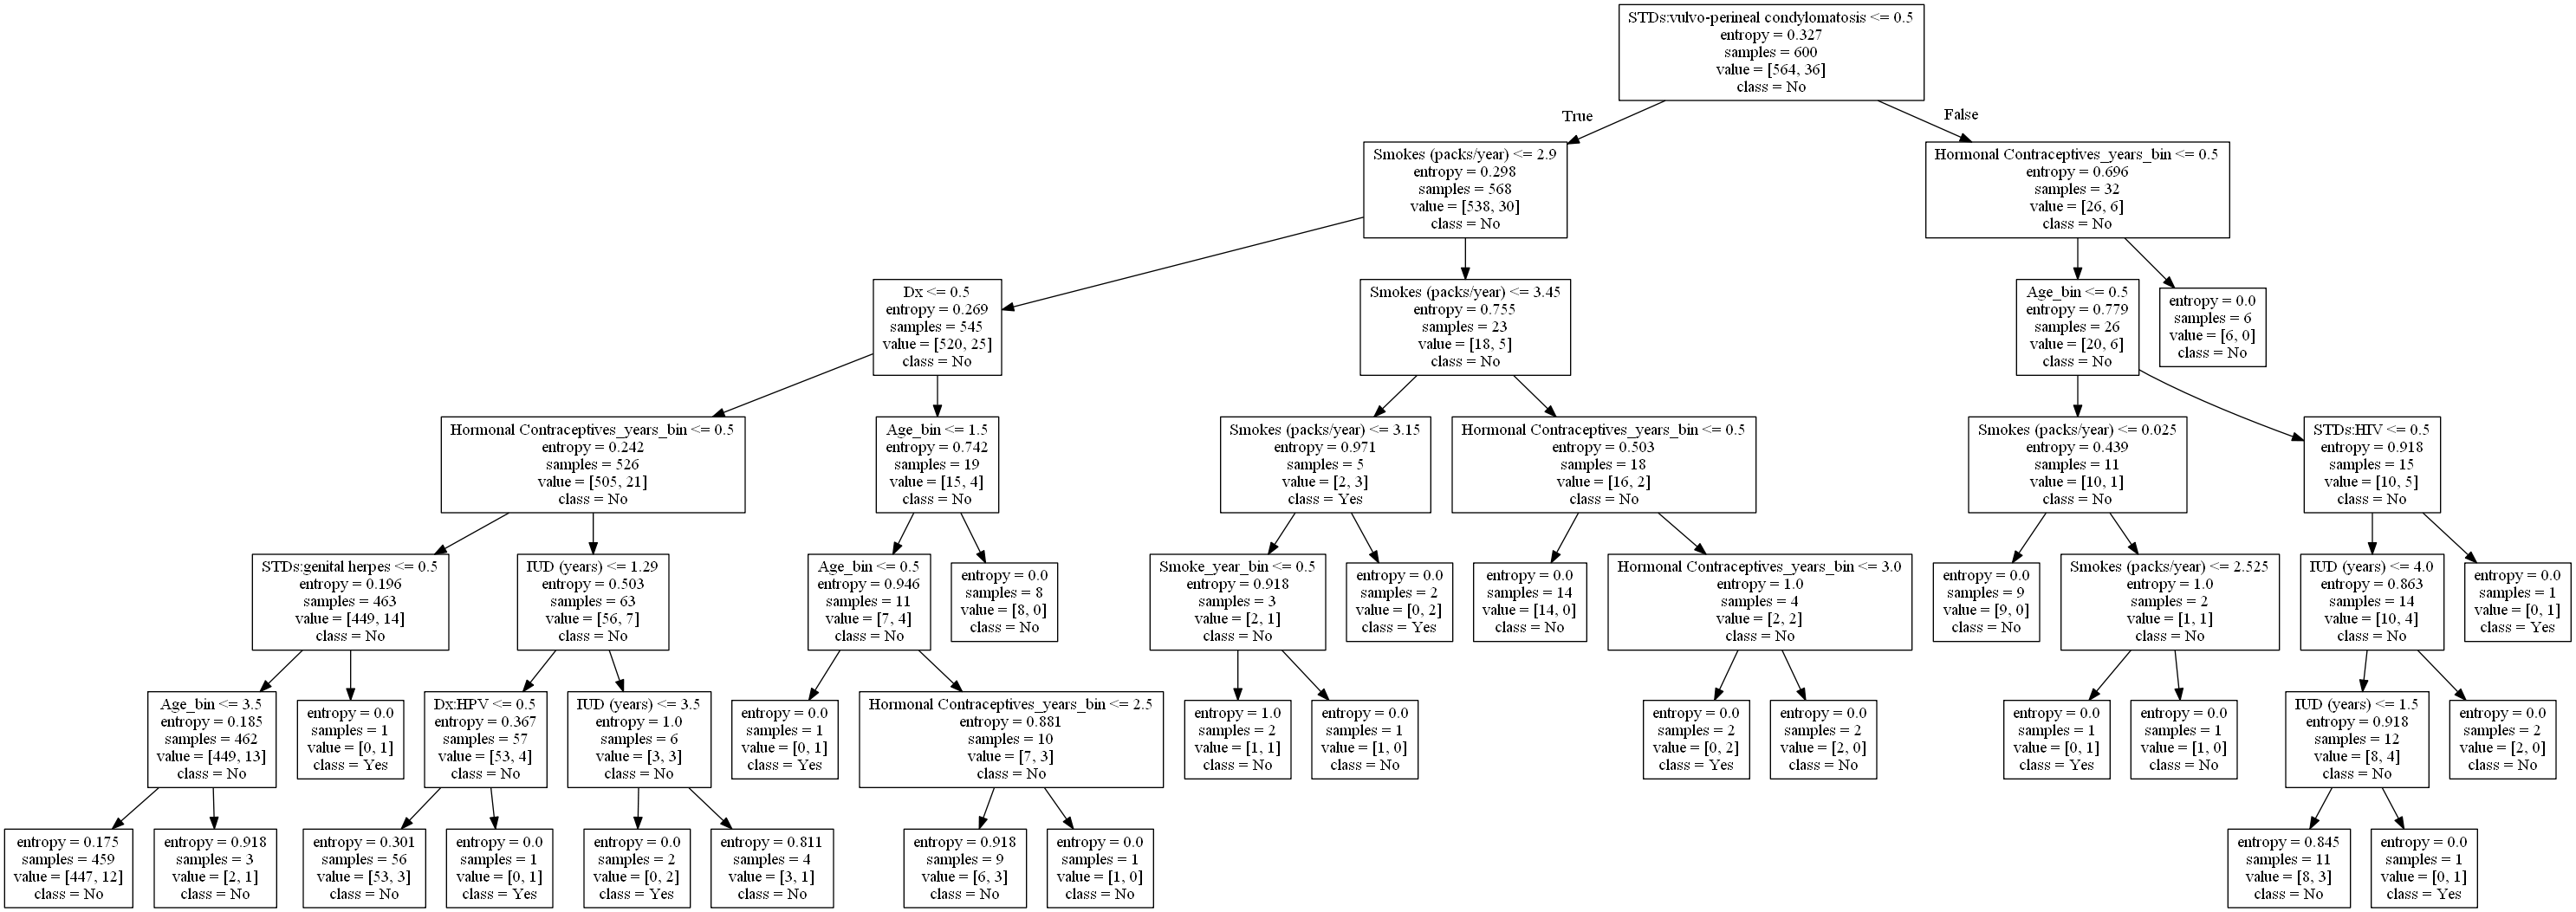

In [390]:
from sklearn import tree
import graphviz
import sklearn
from os import system
from IPython.display import Image  
#DTree_File = open('DT_tree.dot','w')
dotfile = open("biopsy_tree.dot", 'w')
dot_data=sklearn.tree.export_graphviz( dt_model,max_depth=7, out_file=dotfile,label='all',feature_names=features,  class_names = list(train_char_label))
#graph = graphviz.Source(dot_data)
#graph
dotfile.close()
system("dot -Tpng biopsy_tree.dot -o biopsy_tree.png")   # This command is to the OS
Image("biopsy_tree.png") 

# Logistic Regression

In [391]:
from sklearn.linear_model import LogisticRegression

In [392]:
model_lr = LogisticRegression()
model_lr.fit(xtrain,ytrain)
y_pred = model_lr.predict(xtest)
accuracy_score(ytest,y_pred)*100

92.24806201550388

In [393]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       239
           1       0.00      0.00      0.00        19

   micro avg       0.92      0.92      0.92       258
   macro avg       0.46      0.50      0.48       258
weighted avg       0.86      0.92      0.89       258



In [427]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(sampling_strategy = y,random_state=0,ratio=0.4)
X_resampled, y_resampled = ros.fit_resample(x, y)

In [433]:
y_resampled = pd.DataFrame(y_resampled)
#y_resampled['target'].value_counts().sum()

RangeIndex(start=0, stop=192, step=1)

In [404]:
y_resampled = pd.DataFrame(y_resampled)
X_resampled = pd.DataFrame(X_resampled,columns=x.columns)

In [405]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)

In [406]:
model_lr = LogisticRegression()
model_lr.fit(xtrain,ytrain)
y_pred = model_lr.predict(xtest)
accuracy_score(ytest,y_pred)*100

77.2189349112426

In [407]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest,y_pred)*100

22.93159609120522

In [408]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86       253
           1       0.63      0.22      0.33        85

   micro avg       0.77      0.77      0.77       338
   macro avg       0.71      0.59      0.60       338
weighted avg       0.75      0.77      0.73       338



In [409]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=model_lr,n_estimators= 100)
abcl.fit(xtrain,ytrain)
y_pred = abcl.predict(xtest)
accuracy_score(ytest,y_pred)*100

76.62721893491124

In [410]:
scores= cross_val_score(model_lr,xtrain,ytrain,cv=10)

In [411]:
print('The mean is:',scores.mean(), 'and its standard deviation is:',scores.std())

The mean is: 0.7417559234014931 and its standard deviation is: 0.040929869052022984


In [412]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest,y_pred)*100

21.708790242186126